<p><a name="Inicio"></a></p>
<h3 style="font-size: 1.17em; text-align: center;">ESCUELA TÉCNICA SUPERIOR DE INGENIERÍA INFORMÁTICA</h3>
<h3 style="font-size: 1.17em; text-align: center;">UNIVERSIDAD DE SEVILLA</h3>
<h4 style="font-size: 1em; text-align: center;"><strong>CÁLCULO INFINITESIMAL Y NUMÉRICO</strong></h4>
<p><strong><br /></strong></p>
<h3 style="font-size: 1.17em;">PRÁCTICA 3. Interpolación polinomial</h3>
<p>En esta sesión nos marcamos los siguientes objetivos:</p>
<ul>
<li>Describir el proceso de <a href="#lagrange">interpolación polinomial de Lagrange</a>.</li>
<li>Describir el proceso de <a href="#newton">interpolación polinomial de Newton</a>.</li>
<li>Ilustrar el <a href="#runge">efecto de Runge</a> en los problemas de interpolación.</li>
</ul>
<p>La práctica finaliza con la resolución por parte del alumnado de un <a href="#cuestionario">cuestionario</a> con respuestas tipo test que ponga a prueba el nivel de comprensión de los contenidos presentados.</p>

<p><a name="lagrange"></a></p>
<h2>Interpolación polinomial de Lagrange</h2>
<p>Recordemos que, dado un soporte de puntos $S=\{(x_0,y_0),(x_1,y_1),\dots,(x_n,y_n)\}$, se definen los polinomios auxiliares de Lagrange sobre dicho soporte como:</p>
<p>$$L_i(x)=\prod_{j=0,\ j\neq i}^n \frac{x-x_j}{x_i-x_j}  \text{ para} \ \ i=0,1,\dots ,n$$</p>
<p>A continuación definimos la función <span style="color: #0000ff;">pol_aux_lagrange(S, i)</span> que devuelve el polinomio auxiliar de Lagrange asociado al soporte $S$, para el índice $i=0,1,\dots,n$ .</p>

In [5]:
def pol_aux_lagrange(soporte, i):
    listax = [p[0] for p in soporte]
    xi = listax.pop(i)
    numerador = prod((x - xj) for xj in listax)
    denominador = numerador(x = xi)
    return numerador/denominador

<p>Veamos un ejemplo sobre el soporte $S=\{(1,0),(2,-1),(3,2),(4,-5)\}$:</p>

In [2]:
soporte = [(1, 0), (2, -1), (3, 2), (4, -5)]  # Observación: es una lista, se utilizan [ ] en lugar de { }

In [3]:
L2 = pol_aux_lagrange(soporte, 2)
L2

-1/2*(x - 1)*(x - 2)*(x - 4)

In [4]:
for i in range(len(soporte)): print('L_',i ,'=', pol_aux_lagrange(soporte, i))

L_ 0 = -1/6*(x - 2)*(x - 3)*(x - 4)
L_ 1 = 1/2*(x - 1)*(x - 3)*(x - 4)
L_ 2 = -1/2*(x - 1)*(x - 2)*(x - 4)
L_ 3 = 1/6*(x - 1)*(x - 2)*(x - 3)


<p>Vamos a crear la funcion <span style="color: #0000ff;"> grafica_pol_aux_lagrange(soporte, i)</span>  que proporciona la representación gráfica de los polinomios auxiliares de Lagrange:</p>

In [5]:
def grafica_pol_aux_lagrange(soporte, i):
    p(x) = pol_aux_lagrange(soporte, i)
    puntos = [(pto[0], 0) for pto in soporte]
    puntos[i] = (puntos[i][0], 1)
    listax = [pto[0] for pto in soporte]
    xmin = min(listax); xmax = max(listax)
    html('     $\\displaystyle L_{%s}='%i + latex(p(x)) + '=' + latex(expand(p(x))) + '$')
    print()
    return scatter_plot(puntos) + plot(p,(x, xmin, xmax))

<p>Observemos que los polinomios auxiliares de Lagrange $L_i$ toman valor 0 en todos los puntos $x_j$ del soporte excepto en $x_i$ donde vale 1.</p>

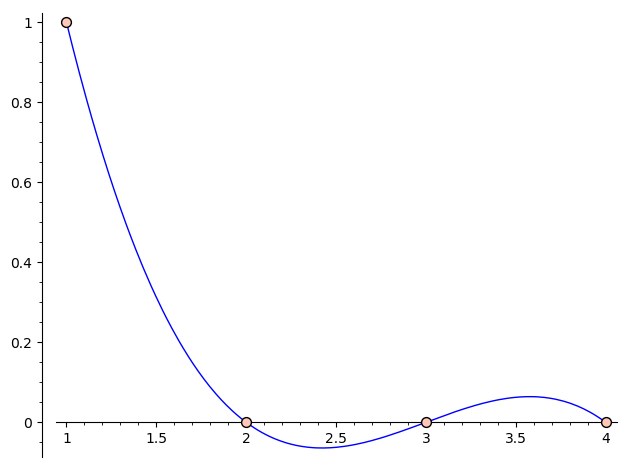

In [6]:
grafica_pol_aux_lagrange(soporte, 0)

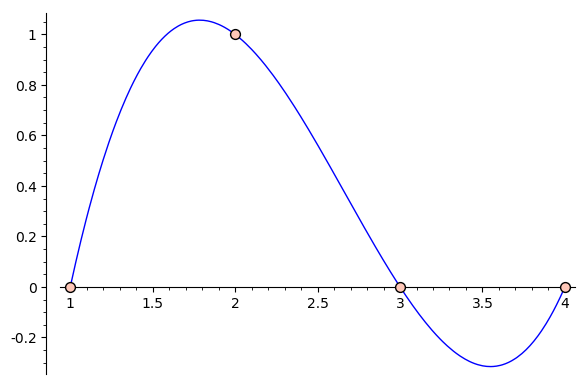

In [7]:
grafica_pol_aux_lagrange(soporte, 1)

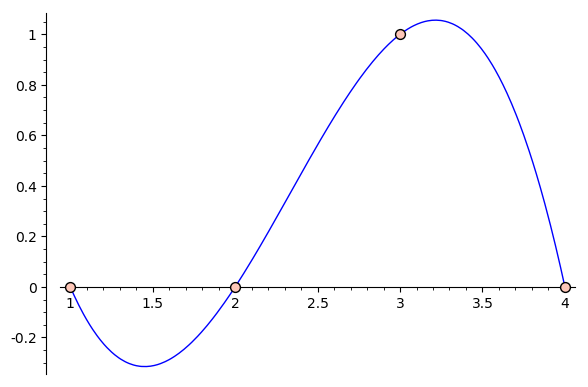

In [8]:
grafica_pol_aux_lagrange(soporte, 2)

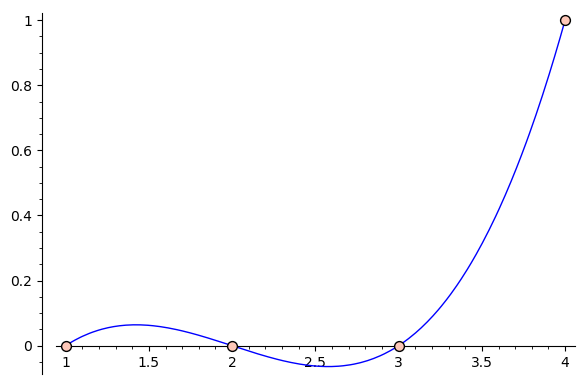

In [9]:
grafica_pol_aux_lagrange(soporte, 3)

<p>Los representamos ahora todos juntos:</p>

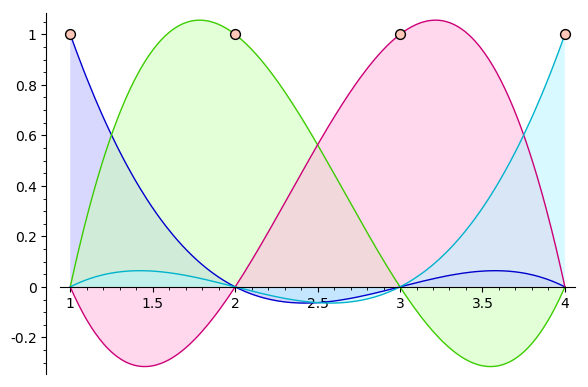

In [10]:
listax = [p[0] for p in soporte]
xmin = min(listax); xmax = max(listax)
plot([pol_aux_lagrange(soporte, i) for i in range(len(soporte))], (x, xmin, xmax) ,fill = True) + scatter_plot([(p[0], 1) for p in soporte])

<p>En realidad, el polinomio interpolador $P_n(x)$  no es más que una combinación lineal de estos polinomios auxiliares. Basta recordar que:</p>
<p>$$P_n(x)=\sum_{i=0}^n\ y_i\ L_i(x)$$</p>
<p>La función <span style="color: #0000ff;">polinomio_lagrange(soporte)</span> devuelve el polinomio interpolador de Lagrange asociado al soporte proporcionado.</p>

In [11]:
def polinomio_lagrange(soporte):
    return sum(pol_aux_lagrange(soporte, i)*soporte[i][1] for i in range(len(soporte)))

In [12]:
p(x) = polinomio_lagrange(soporte)
show(p(x))
show(expand(p(x)))   ## versión simplificada del polinomio interpolador

-5/6*(x - 1)*(x - 2)*(x - 3) - (x - 1)*(x - 2)*(x - 4) - 1/2*(x - 1)*(x - 3)*(x - 4)

-7/3*x^3 + 16*x^2 - 98/3*x + 19

<p>Finalmente, podemos ver la representación gráfica del polinomio interpolador, resaltando los puntos del soporte, mediante la función</p>
<p><span style="color: #0000ff;">grafica_polinomio_lagrange(soporte)</span></p>

In [13]:
def grafica_polinomio_lagrange(soporte, verpoli = True):
    p(x) = polinomio_lagrange(soporte)
    listax = [pto[0] for pto in soporte]
    xmin = min(listax); xmax = max(listax)
    if verpoli:
        pretty_print('   \\displaystyle P_n(x)=' + latex(p(x)) )
        pretty_print('           \\displaystyle =' + latex(expand(p(x))))
        print()
    return scatter_plot(soporte) + plot(p, (x, xmin, xmax))

\displaystyle P_n(x)= -\frac{5}{6} \, {\left(x - 1\right)} {\left(x - 2\right)} {\left(x - 3\right)} - {\left(x - 1\right)} {\left(x - 2\right)} {\left(x - 4\right)} - \frac{1}{2} \, {\left(x - 1\right)} {\left(x - 3\right)} {\left(x - 4\right)}

\displaystyle = -\frac{7}{3} \, x^{3} + 16 \, x^{2} - \frac{98}{3} \, x + 19

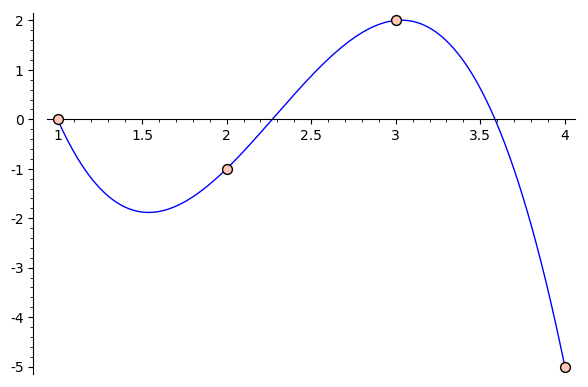

In [14]:
grafica_polinomio_lagrange(soporte, True)

<p><a href="#Inicio">Volver al Índice</a></p>

<p><a name="newton"></a></p>
<h2>Interpolación polinomial de Newton</h2>
<p>A partir de un soporte dado, necesitamos en primer lugar generar la tabla de diferencias divididas. La función <span style="color: #0000ff;">diferencias_divididas(soporte)</span>  proporciona dicha tabla. Disponemos de una versión más visual con <span style="color: #0000ff;">grafica_diferencias_divididas(soporte)</span> </p>

In [11]:
def diferencias_divididas(soporte):
    listax = [p[0] for p in soporte]
    difdiv = [[p[1] for p in soporte]]
    n = len(soporte)
    for i in range(1, n):
        difdiv.append([])
        for j in range(n - i):
            valor = (difdiv[i - 1][j + 1] - difdiv[i - 1][j])/(listax[j + i] - listax[j])
            difdiv[i].append(valor)
    return difdiv

In [12]:
def grafica_diferencias_divididas(soporte):
    tabla = diferencias_divididas(soporte)
    n = len(tabla)
    cabecera = ["$x_i$", "$f(x_i)$"]
    ast="*"
    for i in range(n-1):
        ast +="*"
        cabecera.append("$f["+ast+"]$")
    tabla_amp = [[] for i in range(n+1)]
    for k in soporte:
        tabla_amp[0].append(k[0])
        tabla_amp[0].append(" ")
    j = 0
    for i in range(1,n+1):
        aux = ["" for k in range(j)]
        tabla_amp[i] = copy(aux)
        for k in tabla[i-1]:
            tabla_amp[i].append(k)
            tabla_amp[i].append("")
        tabla_amp[i] = tabla_amp[i] + aux[:-1]
        j = j + 1
    return pretty_print(table(columns = tabla_amp, header_row=cabecera))

In [17]:
tabla = diferencias_divididas(soporte); tabla

[[0, -1, 2, -5], [-1, 3, -7], [2, -5], [-7/3]]

In [13]:
grafica_diferencias_divididas(soporte)

\(x_i\),\(f(x_i)\),\(f[**]\),\(f[***]\),\(f[****]\),\(f[*****]\)
\(-1\),\(-7\),,,,
,,\(5\),,,
\(0\),\(-2\),,\(0\),,
,,\(5\),,\(10\),
\(1\),\(3\),,\(30\),,\(10\)
,,\(65\),,\(50\),
\(2\),\(68\),,\(180\),,
,,\(425\),,,
\(3\),\(493\),,,,


<p>Recordemos que la forma del polinomio interpolador de Newton es:</p>
<p>$$P_n(x)=c_0+\sum_{i=1}^{n} c_i\cdot \prod_{j=0}^{i-1}(x-x_j)$$</p>
<p>$$P_n(x)=c_0+c_1(x-x_0)+c_2(x-x_0)(x-x_1)+\dots+c_n(x-x_0)(x-x_1)\dots(x-x_{n-1})$$</p>
<p>donde los coeficientes ${c_i}$ del polinomio interpolador de Newton son los primeros datos de cada columna en la tabla de diferencias divididas:</p>

In [19]:
coef_newton = [v[0] for v in tabla]
coef_newton

[0, -1, 2, -7/3]

<p>La función <span style="color: #0000ff;">polinomio_newton(soporte)</span> proporciona el polinomio interpolador asociado al método de Newton:</p>

In [21]:
def polinomio_newton(soporte):
    coef_newton = [v[0] for v in diferencias_divididas(soporte)]
    listax = [p[0] for p in soporte]
    pol = []
    pol.append(1)
    n = len(soporte) - 1
    p(x) = coef_newton[0]
    for i in range(1, n + 1):
        pol.append(pol[i - 1]*(x - listax[i - 1]))
        p(x) = p(x) + coef_newton[i]*pol[i]
    return p(x)

In [22]:
p(x) = polinomio_newton(soporte)
show(p(x))
show(expand(p(x)))   ## versión simplificada del polinomio interpolador

10*(x + 1)*(x - 1)*(x - 2)*x + 10*(x + 1)*(x - 1)*x + 5*x - 2

10*x^4 - 10*x^3 - 10*x^2 + 15*x - 2

<p>Finalmente, podemos ver la representación gráfica del polinomio interpolador, resaltando los puntos del soporte con la función</p>
<p><span style="color: #0000ff;">grafica_polinomio_newton(soporte)</span></p>

In [22]:
def grafica_polinomio_newton(soporte, verpoli = False, color = 'blue'):
    p(x) = polinomio_newton(soporte)
    listax = [pto[0] for pto in soporte]
    xmin = min(listax); xmax = max(listax)
    if verpoli:
        pretty_print(r'   \displaystyle P_n(x)=' + latex(p(x)))
        pretty_print(r'           \displaystyle =' + latex(expand(p(x))) )
        print()
    return scatter_plot(soporte) + plot(p, (x, xmin, xmax), color = color)

\displaystyle P_n(x)= -\frac{7}{3} \, {\left(x - 1\right)} {\left(x - 2\right)} {\left(x - 3\right)} + 2 \, {\left(x - 1\right)} {\left(x - 2\right)} - x + 1

\displaystyle = -\frac{7}{3} \, x^{3} + 16 \, x^{2} - \frac{98}{3} \, x + 19

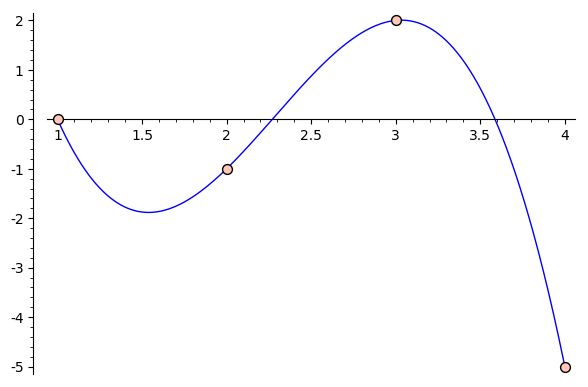

In [23]:
grafica_polinomio_newton(soporte, True)

<h3>Ejemplo de interpolación</h3>
<p>Dada la función  $f(x)=sen(x)+x$, encontrar un polinomio interpolador en el soporte formado por los valores de la variable $x\in \{0,1,2,3,4,5\}$. Utilizar dicho polinomio para hallar una aproximación al valor de $f(2.5)$, esto es, interpolar $f(2.5)$ .</p>

In [24]:
x = var('x')
f(x) = sin(x) + x

In [25]:
listax = [0., 1., 2., 3., 4., 5.]; listax

[0.000000000000000,
 1.00000000000000,
 2.00000000000000,
 3.00000000000000,
 4.00000000000000,
 5.00000000000000]

In [26]:
soporte = [(xi, f(xi)) for xi in listax]; soporte

[(0.000000000000000, 0),
 (1.00000000000000, 1.84147098480790),
 (2.00000000000000, 2.90929742682568),
 (3.00000000000000, 3.14112000805987),
 (4.00000000000000, 3.24319750469207),
 (5.00000000000000, 4.04107572533686)]

In [27]:
p(x) = expand(polinomio_newton(soporte)); p(x)

-0.00541109218118466*x^5 + 0.0861366757358094*x^4 - 0.391935969550822*x^3 + 0.267195289824513*x^2 + 1.88548608097958*x

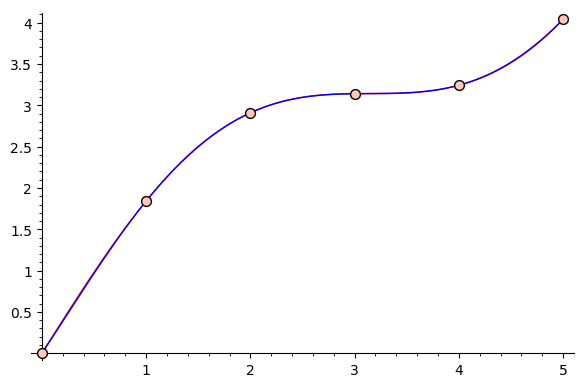

In [28]:
show(plot(f(x), 0, 5, color = 'red') + grafica_polinomio_newton(soporte))

Veamos que existen diferencias apreciables entre el polinomio interpolador y la función interpolada, sobre todo a medida que los alejamos del intervalo de interpolación:

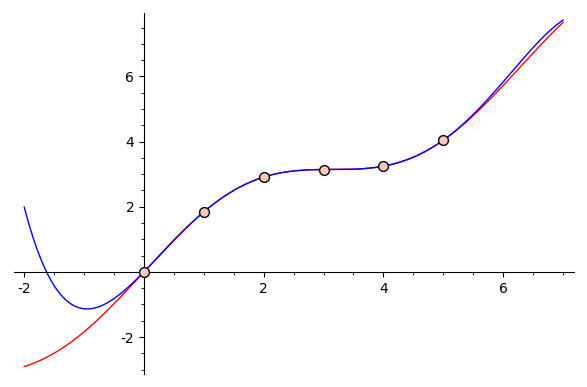

In [29]:
a = -2; b = 7
show(
plot(f(x), a, b, color = 'red')+
plot(p(x), a, b, color = 'blue')+
scatter_plot(soporte)
)

<p>Vamos a interpolar el valor de $f(x)$ en el punto   $x=2.5$   y comprobamos, con su valor real, el error cometido:</p>

In [30]:
c = 2.5

print('P(',c,') =',p(c).n()) 
print('f(',c,') =',f(c).n())  
print('error absoluto =',abs((p(c) - f(c)).n()))

P( 2.50000000000000 ) = 3.09597316473181
f( 2.50000000000000 ) = 3.09847214410396
error absoluto = 0.00249897937214527


<p><a href="#Inicio">Volver al Índice</a></p>

<p><a name="runge"></a></p>
<h2>El efecto de Runge</h2>
<p>Veamos con un ejemplo como varía el nivel de aproximación del polinomio interpolador de una función a medida que incrementamos el número de puntos intermedios del soporte.  Consideremos la función:</p>
<p>$$f(x)=\frac{1}{1+x^2}$$</p>
<p>y el soporte  $\{-4,0,4\}$</p>

In [31]:
f(x) = 1/(1 + x^2)

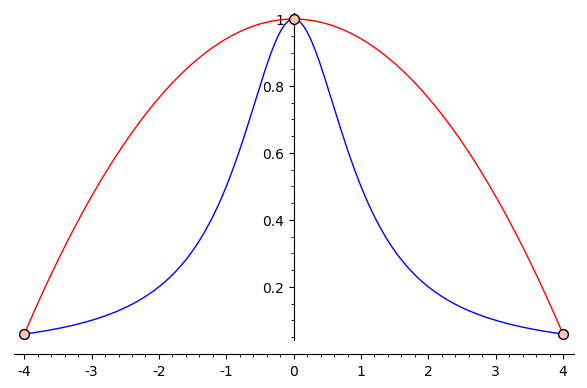

In [32]:
listax = [-4, 0, 4]
soporte = [(xi,f(xi)) for xi in listax]
p(x) = polinomio_newton(soporte)
a = -4; b = 4
plot(f, (x, a, b)) + plot(p, (x, a, b), color = 'red') + scatter_plot(soporte)

<p>Aumentamos el número de puntos del soporte, considerando ahora</p>
<p>$\{-4,-2,0,2,4\}$</p>

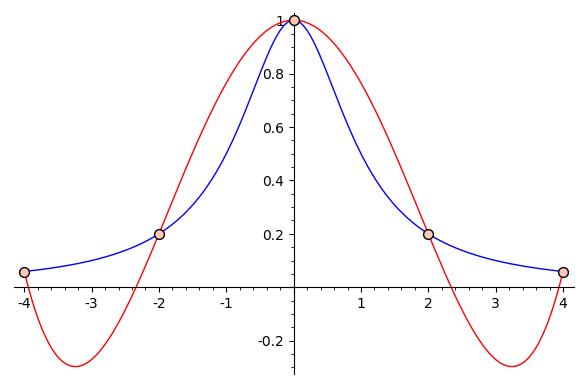

In [33]:
listax = [-4, -2, 0, 2, 4]
soporte = [(xi,f(xi)) for xi in listax]
p(x) = polinomio_newton(soporte)
a = -4; b = 4
plot(f, (x, a, b)) + plot(p, (x, a, b), color = 'red') + scatter_plot(soporte)

<p>Volvemos a incrementar el número de puntos del soporte:</p>
<p>$\{-4,-3,-2,-1,0,1,2,3,4\}$</p>
<p>Observamos el <b>efecto de Runge</b>:  la aproximación mejora en la parte central del intervalo, pero vamos empeorándola en los extremos, donde se producen grandes oscilaciones.</p>

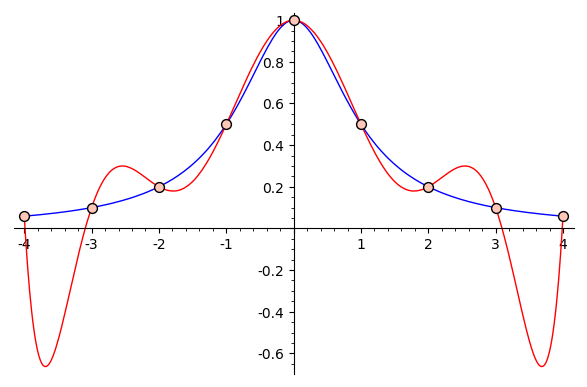

In [34]:
listax = list(range(-4, 5))
soporte = [(xi,f(xi)) for xi in listax]
p(x) = polinomio_newton(soporte)
a = -4; b = 4
plot(f, (x, a, b)) + plot(p, (x, a, b), color = 'red') + scatter_plot(soporte)

<p>Una vez más:</p>

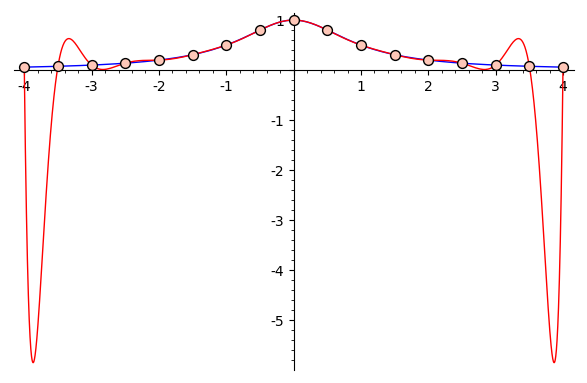

In [35]:
listax = [-4 + i/2 for i in range(17)]
soporte = [(xi,f(xi)) for xi in listax]
p(x) = polinomio_newton(soporte)
a = -4; b = 4
plot(f, (x, a, b)) + plot(p, (x, a, b), color = 'red') + scatter_plot(soporte)

<h3>Paliar el efecto de Runge</h3>
<p>Una alternativa para intentar paliar este efecto es aproximar la función mediante diferentes polinomios de interpolación asociados a una partición del soporte en varias partes. Por ejemplo, a partir del soporte para valores enteros de $x$ desde -4 hasta 4, podemos tomar subconjuntos de 3 en 3 valores y por cada uno de estos tres puntos, hallar el correspondiente polinomio de interpolación. Obtenemos así una aproximación mediante una función a trozos donde cada trozo es un polinomio de interpolación:</p>

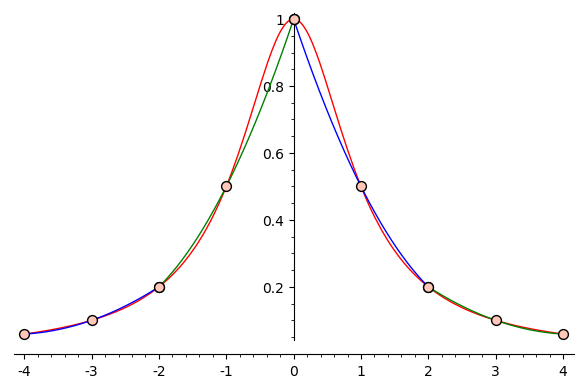

In [36]:
# dividimos el soporte en cuatro:

listax1 = list(range(-4, -1));
listax2 = list(range(-2, 1));
listax3 = list(range(0, 3));
listax4=list(range(2, 5))
soporte1 = [(xi, f(xi)) for xi in listax1]
soporte2 = [(xi, f(xi)) for xi in listax2]
soporte3 = [(xi, f(xi)) for xi in listax3]
soporte4 = [(xi, f(xi)) for xi in listax4]

a = -4; b = 4
show(
plot(f(x), a, b, color = 'red')+
grafica_polinomio_newton(soporte1, False, 'blue')+
grafica_polinomio_newton(soporte2, False, 'green')+
grafica_polinomio_newton(soporte3, False, 'blue')+
grafica_polinomio_newton(soporte4, False, 'green')
)

<p>Otra posible partición del soporte en tres partes de diferentes tamaños:</p>

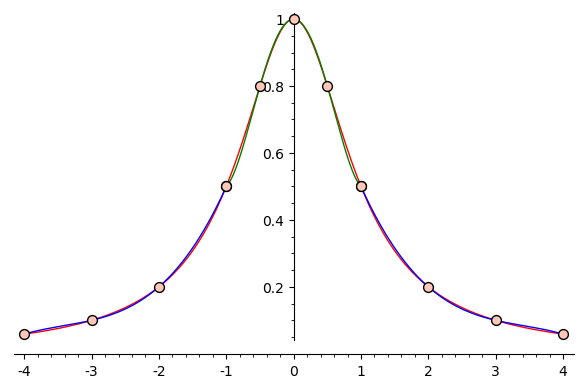

In [37]:
# dividimos el soporte en tres:

listax1 = list(range(-4, 0));
listax2  =[-1 + i/2 for i in range(5)];
listax3 = list(range(1, 5));
soporte1 = [(xi, f(xi)) for xi in listax1]
soporte2 = [(xi, f(xi)) for xi in listax2]
soporte3 = [(xi, f(xi)) for xi in listax3]

a = -4; b = 4
show(
plot(f(x), a, b, color = 'red')+
grafica_polinomio_newton(soporte1, False, 'blue')+
grafica_polinomio_newton(soporte2, False, 'green')+
grafica_polinomio_newton(soporte3, False, 'blue')
)

<p><a href="#Inicio">Volver al Índice</a></p>

<h3><a name="cuestionario"></a></h3>
<h3>CUESTIONARIO PARA EL ALUMNADO</h3>
<p><span id="cell_outer_0">Introduzca en la variable NUMERO_CUESTIONARIO, que aparece más abajo, el número correspondiente a su cuestionario y ejecuta la celda (*Shift* + *Enter* desde dentro de la celda). Accederá a un cuestionario con respuestas tipo test que se entregará cumplimentado ANTES DE FINALIZAR ESTA SESIÓN PRÁCTICA.</span></p>

In [1]:
NUMERO_CUESTIONARIO = 127      ## INTRODUZCA EL NÚMERO QUE LE HAN ASIGNADO

### NO MODIFICAR EL CÓDIGO QUE SIGUE:

NOMBRE_FICHERO_CUESTIONARIO = 'CIN_L3_t.htl'
load('codigo_examinar_html.sage')

if NUMERO_CUESTIONARIO > 0:
    lector_examenes(NOMBRE_FICHERO_CUESTIONARIO, NUMERO_CUESTIONARIO, False)

<center><h4>E.T.S.I.I. - GRADOS EN INGENIERÍA INFORMÁTICA</h4></center><center><h4>Cálculo Infinitesimal y Numérico - TERCERA PRÁCTICA DE LABORATORIO</h4></center><hr  align=center><center>APELLIDOS, NOMBRE: <INPUT value= "",type=text size=70> <INPUT type=submit value=127-F653><hr  align=center></center><hr  align=center><b> <span style="color: #0000ff;">EJERCICIO 1 </span></b><br> Dada la función \(f(x)=2x^5+3x-2\), consideremos un soporte \(S\) para valores de
 \(x\in\{-1,0,1,2,3\}\). Se pide:<ol><li>Hallar los polinomios auxiliares de Lagrange \(p(x)=L_{0}\) y \(q(x)=L_{2}\).</li><li>Aplicando las diferencias divididas de Newton a \(S\), hallar el valor de \(f[-1,0,1]\).</li><li>Indicar el valor del coeficiente del término de grado \(1\) del polinomio de
 interpolación asociado al soporte \(S\).</li><li>Hallar el valor aproximado de \(f(-0.5)\) empleando el polinomio de interpolación.</li></ol>Marcar la respuesta correcta, aplicando un grado de precisión de 5 cifras
 decimales exactas.<br><hr  align=center><b> <span style="color: #ff0000;">Respuesta al apartado 1 </span></b><br><br> 1.<input type=checkbox> \(p(x)=1/24*(x - 3)*(x - 2)*(x - 1)*x\ \)   y   \(\ q(x)=1/4*(x - 3)*(x - 2)*(x + 1)*x\) <br> 2.<input type=checkbox> \(p(x)=1/120*(x - 2)*(x - 1)*(x + 1)*x\ \)   y   \(\ q(x)=1/6*(x - 2)*(x - 1)*(x + 1)*(x + 3)\) <br> 3.<input type=checkbox> \(p(x)=-1/12*(x - 2)*(x - 1)*(x + 3)*x\ \)   y   \(\ q(x)=1/6*(x - 2)*(x - 1)*(x + 1)*(x + 3)\) <br> 4.<input type=checkbox> \(p(x)=1/24*(x - 3)*(x - 2)*(x - 1)*x\ \)   y   \(\ q(x)=-1/6*(x - 3)*(x - 1)*(x + 1)*x\)<br><br><b> <span style="color: #ff0000;">Respuesta al apartado 2 </span></b><br><br> 1.<input type=checkbox> 12 <br> 2.<input type=checkbox> -4 <br> 3.<input type=checkbox> 0 <br> 4.<input type=checkbox> 30<br><br><b> <span style="color: #ff0000;">Respuesta al apartado 3 </span></b><br><br> 1.<input type=checkbox> 6 <br> 2.<input type=checkbox> 4 <br> 3.<input type=checkbox> 15 <br> 4.<input type=checkbox> -9<br><br><b> <span style="color: #ff0000;">Respuesta al apartado 4 </span></b><br><br> 1.<input type=checkbox> 12.5625 <br> 2.<input type=checkbox> 2.125 <br> 3.<input type=checkbox> -10.125 <br> 4.<input type=checkbox> Ninguna de las otras respuestas.<br><br><hr  align=center><b> <span style="color: #0000ff;">EJERCICIO 2 </span></b><br> Sea \(f(x)\) una función tal que \(f(1)=0\). Se sabe que el polinomio interpolador de \(f(x)\) en el soporte para valores de \(x\), 
 \(S=\{-2,-1,0\}\), es \(P(x)=1-2x+x^2\). Se pide:<ol><li>Calcula el polinomio interpolador \(Q(x)\) de \(f(x)\) en el soporte \(S\cup\{1\}\)</li><li>Calcula el polinomio interpolador \(R(x)\) de \(-xf(x)\) en el soporte \(S_1=\{-1,0,1\}\)</li><li>Calcula el polinomio interpolador \(S(x)\) de \(x+f(x)\) en el soporte \(S_2=\{-2,-1,0\}\)</li></ol>Marcar la respuesta correcta.<br><hr  align=center><b> <span style="color: #ff0000;">Respuesta al apartado 1 </span></b><br><br> 1.<input type=checkbox> \(Q(x)=1+2x+x^2\) <br> 2.<input type=checkbox> \(Q(x)=P(x)\) <br> 3.<input type=checkbox> \(Q(x)=2+x+x^2\) <br> 4.<input type=checkbox> Ninguna de las otras respuestas.<br><br><b> <span style="color: #ff0000;">Respuesta al apartado 2 </span></b><br><br> 1.<input type=checkbox> \(3x^2-x\) <br> 2.<input type=checkbox> \(x^2+x\) <br> 3.<input type=checkbox> \(2x^2-2x\) <br> 4.<input type=checkbox> Ninguna de las otras respuestas.<br><br><b> <span style="color: #ff0000;">Respuesta al apartado 3 </span></b><br><br> 1.<input type=checkbox> \(-2+x^2\) <br> 2.<input type=checkbox> \(1-x+x^2\) <br> 3.<input type=checkbox> \(-1+x-x^2\) <br> 4.<input type=checkbox> \(-2-2x+x^2\)<br><br><hr  align=center><center><span style="font-size: x-small;"> Final del documento </span></center>

<p><a href="#Inicio">Volver al Índice</a></p>

EJERCICIO 1.1 sol: 1

In [16]:
f(x) = 2*x**5 + 3*x-2
show(f(x))

2*x^5 + 3*x - 2

In [24]:
listax = [-1,0,1,2,3]
soporte = [(xi,f(xi))  for xi in listax]
soporte

[(-1, -7), (0, -2), (1, 3), (2, 68), (3, 493)]

In [18]:
L0 = pol_aux_lagrange(soporte, 0)
L0

1/24*(x - 1)*(x - 2)*(x - 3)*x

In [19]:
L2 = pol_aux_lagrange(soporte, 2)
L2

1/4*(x + 1)*(x - 2)*(x - 3)*x

EJERCICIO 1.2 sol: 3

In [20]:
grafica_diferencias_divididas(soporte)

\(x_i\),\(f(x_i)\),\(f[**]\),\(f[***]\),\(f[****]\),\(f[*****]\)
\(-1\),\(-7\),,,,
,,\(5\),,,
\(0\),\(-2\),,\(0\),,
,,\(5\),,\(10\),
\(1\),\(3\),,\(30\),,\(10\)
,,\(65\),,\(50\),
\(2\),\(68\),,\(180\),,
,,\(425\),,,
\(3\),\(493\),,,,


EJERCICIO 1.3 sol: 3

In [26]:
p(x) = polinomio_newton(soporte)
show(p(x))
show(expand(p(x)))   ## versión simplificada del polinomio interpolador

10*(x + 1)*(x - 1)*(x - 2)*x + 10*(x + 1)*(x - 1)*x + 5*x - 2

10*x^4 - 10*x^3 - 10*x^2 + 15*x - 2

EJERCICIO 1.4 sol: 3

In [28]:
c = -0.5

print('P(',c,') =',p(c).n()) 

P( -0.500000000000000 ) = -10.1250000000000


EJERCICIO 2.1 Sol: 2

In [29]:
p(x) = 1-2*x+x**2
show(p(x))

x^2 - 2*x + 1

In [30]:
p(1)

0

EJERCICIO 2.2 sol:3

In [38]:
listax = [-1,0,1]
soporte = [(xi,-xi*p(xi)) for xi in listax]
soporte

[(-1, 4), (0, 0), (1, 0)]

In [39]:
r(x) = polinomio_newton(soporte)
show(r(x))
show(expand(r(x)))   ## versión simplificada del polinomio interpolador

2*(x + 1)*x - 4*x

2*x^2 - 2*x

EJERCICIO 2.3 sol: 2

In [40]:
listax = [-2,-1,0]
soporte = [(xi,xi+p(xi)) for xi in listax]
soporte

[(-2, 7), (-1, 3), (0, 1)]

In [41]:
s(x) = polinomio_newton(soporte)
show(s(x))
show(expand(s(x)))   ## versión simplificada del polinomio interpolador

(x + 2)*(x + 1) - 4*x - 1

x^2 - x + 1